# Predict Heart Disease using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

# models - this is a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

Step by step:
1. Problem definition
2. Data (from https://www.kaggle.com/c/heart-disease-uci/data)
3. Evaluation (estimativas)
4. Features (data description)
5. Modelling
6. Experimentation

**Data description**

1. age - The age of the patient;
2. sex - The gender of the patient. (1 = male, 0 = female);
3. cp - Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic);
4. trestbps - Resting blood pressure in mmHg;
5. chol - Serum Cholestero in mg/dl;
6. fbs - Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise);
7. restecg - Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy);
8. thalach - Max heart rate achieved;
9. exang - Exercise induced angina (1 = yes, 0 = no);
10. oldpeak - ST depression induced by exercise relative to rest;
11. slope - Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping);
12. ca - Number of major vessels (0–3) colored by flourosopy;
13. thal - Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect);
14. num - Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

Questions to answer:
1. What is the problem I'm trying to solve?
2. What kind of data I have and how am I going to treat all the different kinds of data (numerical, strings etc.)?
3. What is missing on data and how I'll handle it?
4. Where are the outliers (dados "muito distantes dos outros") and why I care about them?
5. How can I add, change or remove features in order to get more of my data?

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

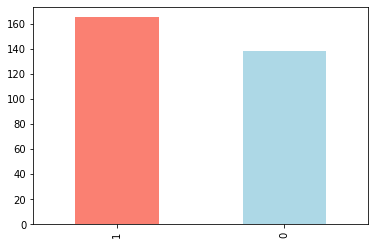

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [5]:
# Getting some info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Is there missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to sex

In [7]:
df.sex.value_counts() # 1 = male // 0 = female

1    207
0     96
Name: sex, dtype: int64

In [8]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


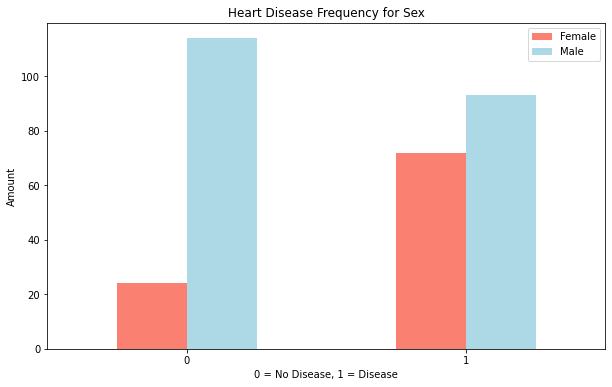

In [9]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # este comando rotaciona o que está escrito no eixo-x

In [10]:
df["thalach"].value_counts()
# o valor de "lenght" indica a quantidade de valores diferentes naquela coluna. Dessa forma, não seria interessante
# analisar esses valores por meio de gráfico em barra, mas talvez por pontos!

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

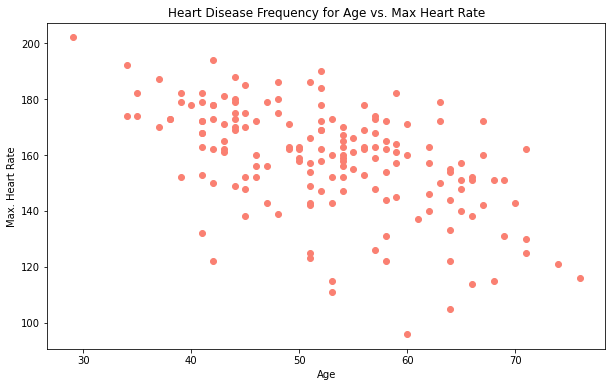

In [11]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon"); 
# no caso de age e thalach, estamos plotando somente as informações referentes a target = 1, ou seja,
# referentes aos pacientes que apresentaram doenças cardíacas.
plt.title("Heart Disease Frequency for Age vs. Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate");

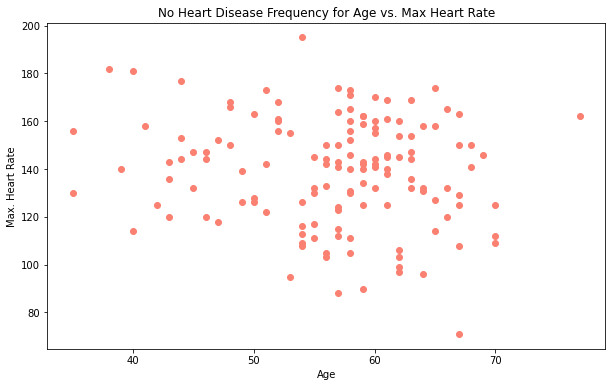

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="salmon"); 
# no caso de age e thalach, estamos plotando somente as informações referentes a target = 0, ou seja,
# referentes aos pacientes que NÃO apresentaram doenças cardíacas.
plt.title("No Heart Disease Frequency for Age vs. Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate");

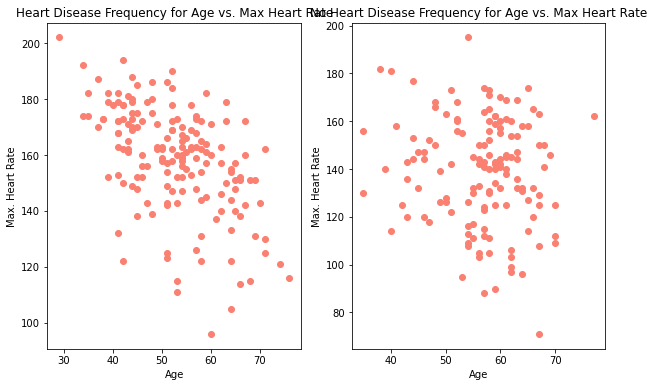

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# Scatter with positive examples
ax[0].scatter = ax[0].scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c="salmon");
ax[0].set(title="Heart Disease Frequency for Age vs. Max Heart Rate", xlabel="Age", ylabel="Max. Heart Rate")

# Scatter with negative examples
ax[1].scatter = ax[1].scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c="salmon");
ax[1].set(title="No Heart Disease Frequency for Age vs. Max Heart Rate", xlabel="Age", ylabel="Max. Heart Rate");

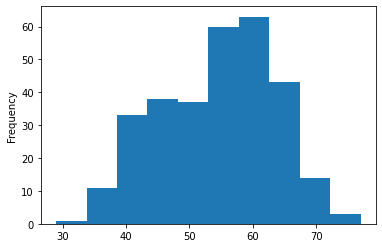

In [14]:
# Check the distribuition of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic);

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


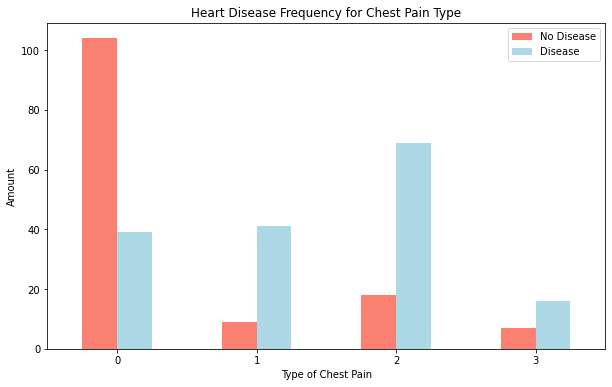

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Chest Pain Type")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

# Correlation matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


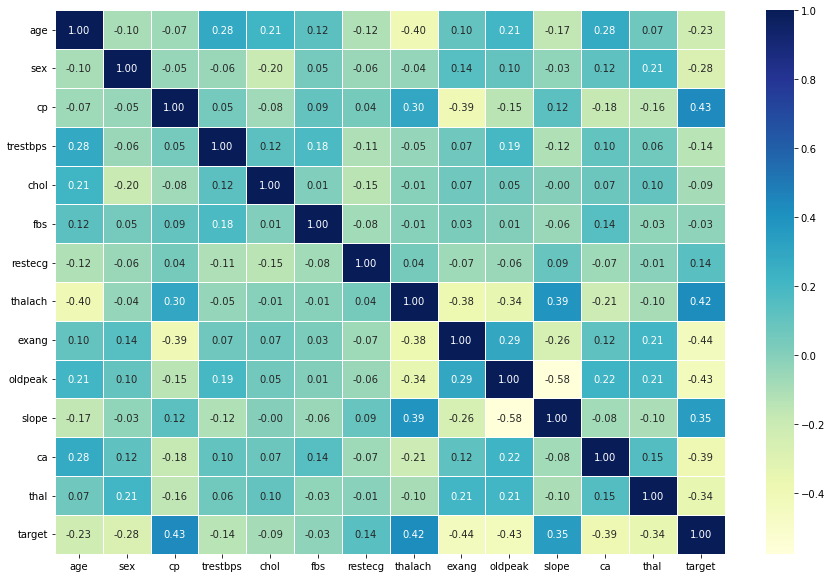

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.yticks(rotation=0);
# linewidths = espessura da linha, fmt = número de casas decimais por valor, cmap = color map

# annotbool or rectangular dataset, optional
# If True, write the data value in each cell. If an array-like with the same shape as data, then use this to 
# annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

# Modelling

In [19]:
# Setup random seed
np.random.seed(42)

# Create the data
X = df.drop("target", axis=1)
Y = df["target"]

# Split it into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Three possible models to use:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [20]:
# Let's create a dictionary containing all the models
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score (models, X_train, X_test, Y_train, Y_test):
    #np.random.seed(42)
    # criando um dicionário (vazio) para os modelos - ele será preenchido conforme a função for utilizada em loop
    model_scores = {}
    # looping through the models
    for name, model in models.items():
        # fit the model
        model.fit(X_train, Y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

### Model comparison

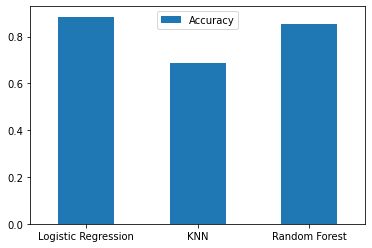

In [22]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusin matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [23]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through differente n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN score on the test data: 75.41%


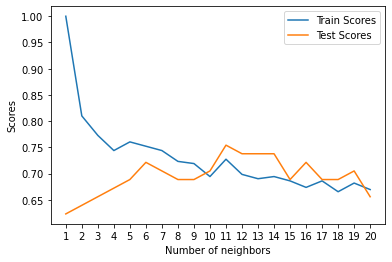

In [24]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

# O melhor n_neighbors é n = 11! Mesmo assim, ele ainda continua o pior modelo até aqui!

## Hyperparameter tuning (with RandomizedSearchCV)

In [25]:
# Create a hyperparemeter grid for Logistic Regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [27]:
# Tuning Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [32]:
# Tuning Random Forest Classifier
np.random.seed(42)

# Setup random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose=True)

# Fit random hyperparameter search model for Random Forest Classifier
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

## Hyperparameter tuning (with GridSearchCV)

In [36]:
# Create a hyperparemeter grid for Logistic Regression

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                     param_grid = log_reg_grid,
                     cv = 5,
                     verbose=True)

# Fit random hyperparameter search model for Logistic Regression
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [43]:
# Make predictions with tuned model
Y_preds = gs_log_reg.predict(X_test)

C:\Users\silva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


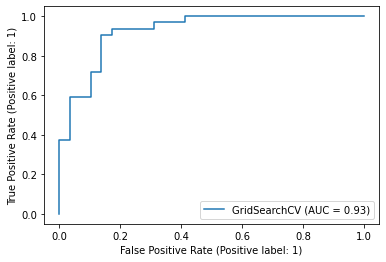

In [45]:
# Plotting ROC curve and calculating AUC score
plot_roc_curve(gs_log_reg, X_test, Y_test);

In [46]:
# Confusion matrix
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


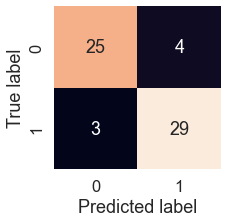

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(Y_test, Y_preds)

Let's get a classification report as well as a cross-validated precision, recall and f1 score

In [50]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluations using cross-validation

In [51]:
# Checking the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
# Creating a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, Y, cv = 5, scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [57]:
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.8446994535519124

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, Y, cv = 5, scoring="precision")

cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [59]:
cv_precision_mean = np.mean(cv_precision)
cv_precision_mean

0.8207936507936507

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, Y, cv = 5, scoring="recall")

cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [61]:
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9212121212121213

In [62]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, Y, cv = 5, scoring="f1")

cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [63]:
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8673007976269721

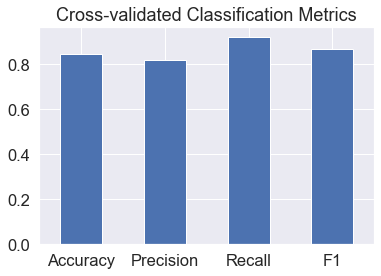

In [65]:
# Visualizing our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_mean,
                            "Precision": cv_precision_mean,
                            "Recall": cv_recall_mean,
                            "F1": cv_f1_mean},
                            index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False)
plt.xticks(rotation=0);

### Feature Importance

In [66]:
# Fitting an instance of Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, Y_train);

In [67]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [68]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

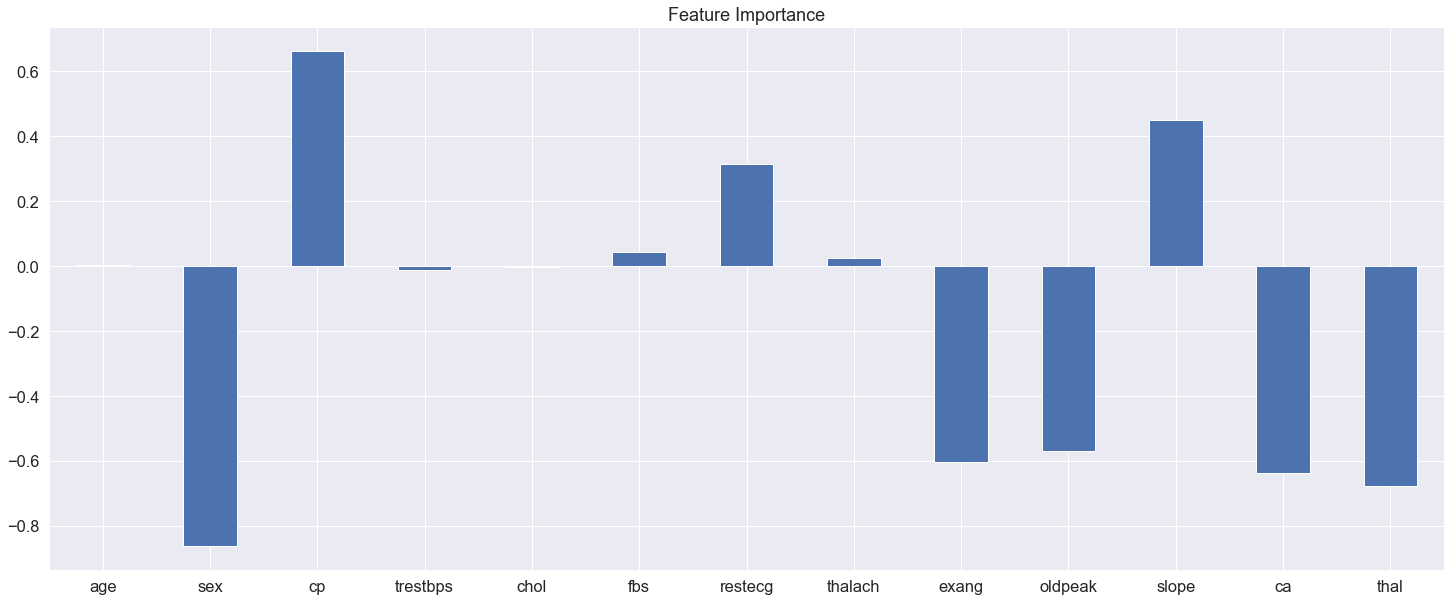

In [86]:
# Visualizing our coefs
vis_coef = pd.DataFrame((feature_dict),index=[0])

vis_coef.T.plot.bar(title="Feature Importance", figsize=(25,10), legend=False)
plt.xticks(rotation=0);